<a href="https://colab.research.google.com/github/Wyndegarde/Multi-class-classification-Kim-CNN/blob/main/Assignment_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Names and IDs

- Group AM

- Student names and IDs
1. Liam Humphreys (ID: 202065914) 
2. Lewis Mckenzie (ID: 202094385) 
3. Ruth Wannasiri (ID: 202088433)
4. TSZ YAN LI(ID: 202081936)


# Abstract
Task: Multi class Classification. 

Using various models and tokenisation methods, we attempted to accurately classify which industry a document belonged to using text from said document.

To do this a number of approaches were taken: 
  1. A baseline Random Forest model. 
  2. A dense neural network 
  3. A BERT model from the simple transformers library
  4. Variations of Yoon Kim's CNN model using single and multiple features with both a simple tokeniser and a BERT tokeniser. 

From these models it was found that the KimCNN and Random Forest performed best. The Random Forest was a much simpler model, however it is believed that the KimCNN would generalise better. 

# Preprocessing


---
Within the training data Title and Description columns were identified as two features of interest. Within these columns were primarily german words, but also some English words. As these were text features several steps had to be taken to make these suitable for models. 

  1. All stop words were removed using the 'nltk' package. Both English and German stop words 

  2. All numbers and punctuation was removed, leaving only alphabetic characters (including German letters). 

  3. Everything was then converted to lower case. 

  4. The test data was then prepared in the same way.

---



With these two columns in an acceptable format, each feature was seperately split into training/validation sets (final 20% of columns set aside for validation). Two methods were used to transform the text into an acceptable numerical format. 

## Random Forest specific Preprocessing
---


In order to transform the base text into numeric values so that it can be used by the baseline model we incorporated the use of term frequency-inverse document frequency (TFID) in our pre-processing. This converts text into a numeric value which represents the importance of a word within the entire body of text. Term frequency describes the number of occurrences of a word within the document with larger values reflecting more common words. Inverse document frequency lowers the weight of words which are very frequent and instead increases the weight of rarer words. 

## Neural Network specific Preprocessing
---


For the Neural networks the features were tokenized using the Keras preprocessing.text package. To do this, the following tokenization parameters were applied to each feature:

                  Descriptions         Title
    Vocab Size      10,000             5,000
    Max legnth      150                 18
    Truncation      True(Post)        True(Post) 
    Padding         True(Post)        True(Post) 
    OOV Token       "<OOV>"           "<OOV>"

* The vocab sizes were chosen based on the word indexes of each feature. 

* and maximum sequence legnths were chosen by looking at the frequency of each unique sentence length for both features. As seen Below


* Sentence lengths of descriptions column (after preprocessing text)
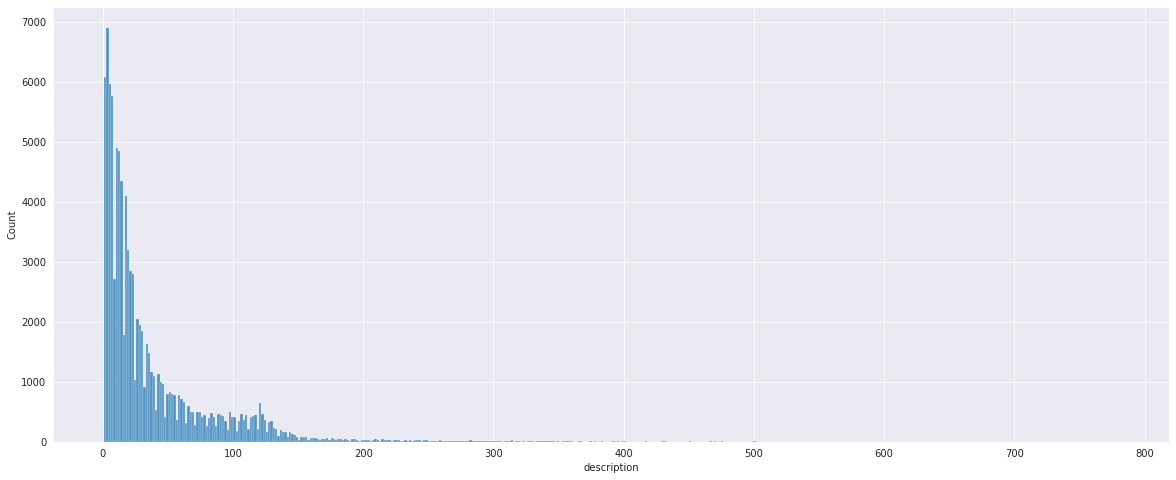

* Sentence length of Title column (after preprocessing text)
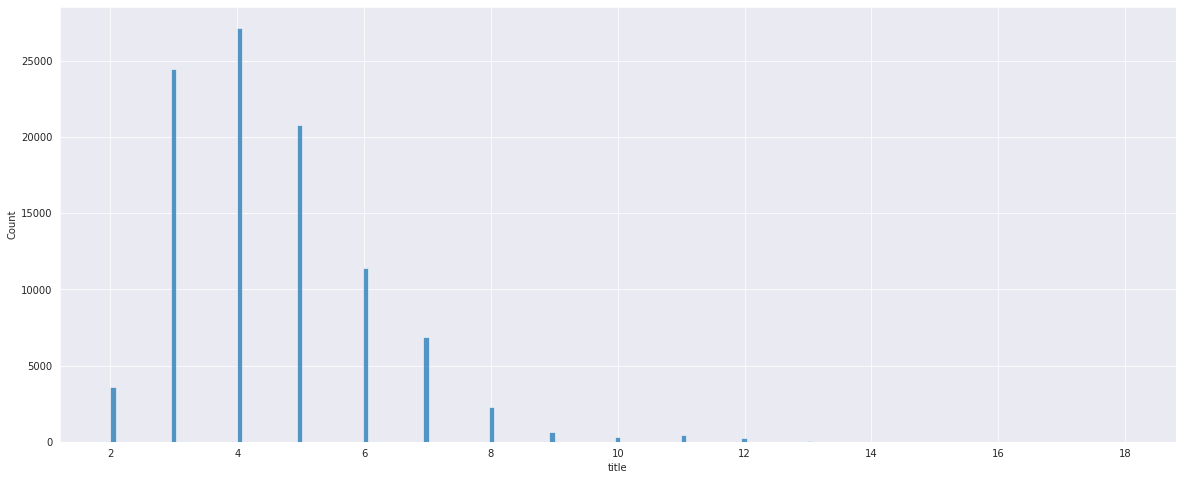

# Summary

# Random Forest Model 


---
In order to select a baseline model we opted to use a process of elimination by testing multiple models and then selecting the best performing model. We used 3 models: an SVM, Naive Bayes, and a Random Forest. All 3 models were run on both the title feature and description in order to examine how model performance varied with feature. After conducting the tests we identified the best performer to be a Random Forests using the title feature.

Originally outlined in Ho, Tin Kam (1995), Random Forests are a well known machine learning model that are essentially an ensemble of another model called a decision tree. Decision trees utilize a series of binary decisions to filter data through different branches until it arrives at the predicted class (called the leaves). Random Forests create an ensemble of decision trees by simultaneously training a given number of trees and then averaging results to yield a model that will generally outperform any single decision tree whilst mitigating overfitting, a common risk when using individual decision trees. 

Parameter tuning was difficult for this model as it was very computationally expensive to run and as such we were limited in our ability to test configurations. As such our focus was on the number of estimators and criteria to use. The number of estimators our Random Forest used was 300 which can be thought of as using 300 decision trees.. As this was  a classification task we tested both Gini and Entropy as the criterion to split at each node. We found Gini to be slightly superior so opted to use this for our model. All other parameters were kept at default. 



# Deep Neural Network With embeddings 


---
Pre-processing for the Neural Network differed from the baseline Random Forest as we did not use TFID and instead added additional preprocessing to tokenize using the Tokenizer module. The model used a sequential architecture with 4 hidden layers each with 100 neurons. On top of this each hidden layer was preceded by a dropout layer with a dropout rate of 0.05 in order to mitigate overfitting. Each dense layer of neurons used a relu activation function. We also incorporated an embedding layer in order to reduce dimensionality. Following this layer we included a global average pooling layer to minimize overfitting by reducing the number of parameters in the model. The implementation of the Neural Network was done using a function in order to ensure the code itself is maintainable as well as making parameter tweaking easier.


# Simple Transformers model


---
The simple transformers module allows for an easy way to implement a BERT model in just three lines of code. To run this model all that is needed is: 

  1. a training dataframe containing text and its corresponding label. 
  2. an equivalent evaluation dataframe
  3. a choice of pretrained BERT (or family of) model. 

For this task, the bert-base-german-dbmdx-uncased pretrained model was used (ref: https://github.com/dbmdz/berts). This model was chosen due to it being trained on a 16gb German lagnuage dataset from multiple sources. While some of this dataset contained English, this model performed exactly the same as any multilingual model used, so the lower training time meant this model was chosen.

This model returns two metrics: evaluation loss (0.5887082665669903) and Matthew's correlation coefficient (0.7988566639550154). # Explain MCC. 

Fine tuning the arguments of this model did not do much to improve these metrics. If it were desired to improve these results this model could be used as a baseline and be trained downstream with additional layers. However the simpletransformers library runs off PyTorch, so it was not possible to use this as a base model in any Keras models.

Kaggle Accuracy: 85%. 


# Yoon Kim CNN Model with Simple Tokenisation 


---
The next two architectures built were based on the 2014 paper by Yoon Kim on using CNN's for sentence classification. 
* (ref: https://www.semanticscholar.org/paper/Convolutional-Neural-Networks-for-Sentence-Kim/1f6ba0782862ec12a5ec6d7fb608523d55b0c6ba) 

The hyperparameters within this model were kept as close to the specifications cited within the paper as possible. The input sentences were fed through an embedding layer with 100 dimensional outputs. This embedding was then fed through three seperate channels, each with a 1D convolutional layer (each with 100 feature maps, and ReLu activation function), a dropout layer (set at 50%) and a max pooling layer which was then flattened from 3D to 2D. All three flattened channels were then concatenated and fed through a dense layer with 50 neurons which was connected to the final output layer. 

The dropout was set at 50% just as within the paper, which notes that such a high dropout was sufficient as the only regularisation technique. 

These channels were distinct in that the convolutional layer of each chanel had a different kernal size. 
In one channel the idea is that the model can detect and process different groups of words and then learn how to interpret these groups for classification. 
By using multiple channels, the model can interpret the meaning of groups of different length and better identify key groupings of varying lengths. For this model, kernal sizes of 4,6 and 8 were used. 


A model using this architecture was first built using the 'descriptions' feature from the dataset. After seeing positive results from using the 'title' column in our Random Forest model, another model was built with the CNN architecture using 'title'. Both of these returned similar results.

It was after this, a further development was proposed to improve results and that's when the final model architechture was developed. This final model used the same fundemental structure of Yoon Kim's paper, but now allowed for two text features to be processed simultaneously. This resulted in a model with 2 sets of 3 channels (one set for each feature), each set was concantecated to produce final outputs for each feature and then concantecated again to give one final output to be fed into the penultimate dense layer. 

This architechture improved performance in training by approximately 4% and the final predictions by approximately 6%. 


# Further Developments


---
The Previous models performed well, however this is a relatively simple dataset compared to what it could have been. Given that the data used was mostly in German, after preprocessing a simple tokenizer was deemed sufficient to achieve a high score. this could also be why the Random Forest performed so well despite being the simplest model by far. 

If there were multiple languages within the two features that were chosen, then it is expected that this is where traditional machine learning approaches or simple Tokenisation would be insufficient. 

This is where the power of BERT tokenisation and models comes into play. With more complex datasets it would be advised to implement BERT tokenisers and models. 

We implemented a simplified version of a BERT tokeniser which uses a multilingual pretrained Bert model as the tokeniser. It does not make use of the attention masks or embedd these tokens (and so the special tokens are not used). These were not included as the co
mplexity involved with including these within our CNN model was too much to for a single GPU (even this simple implementation resulted in 15 min epoch times). This example was just a exploratory investigation as to how one might look to better generalise our models. 

# Results and Discussion


---
The result of each model can be seen below. Note that the Simple Transformers model was excluded, but achieved a score of 85% on Kaggle, this is without any downstream training. Significant time could not be spent on this model however for the reasons dicsussed.


                          Random Forest         DNN          First CNN(Only Description)            First CNN(two features)           Second CNN
    Training Accuracy        96.82%             92.23%                    94.49%                            98.26%                     97.79%

    Evaluation Accuracy      92.87%             91.58%                    85.05%                            93.59%                    87.64%        
    
    Kaggle Accuracy          93.44%             91.36%                    86.91%                            93.67%                    77.77% 


![Picture](https://drive.google.com/uc?export=view&id=15UPUrQk-cU6MnDAE2ITrsF8lGBb2Dn39)

# Recommendations
---


It is our recommendation that for datasets similar to the one provided, the Random Forest model should be used. It's ability to achieve high accuracy while being simple and easy to implement gives it an advantage over the Neural networks that were built. 

However for future text classification tasks consisting of multiple languages, the CNN approach will be more suitable, Ideally utilising a BERT tokeniser. 

Future work could including utilising the full power of BERT models for tasks such as this, where for instance the embedding layer of the CNN could be replaced by the embeddings from a pretrained Bert model. This however is something that would require a lot of processing power and should not be done unless the task demands it. 


# Code

## Preprocessing Code

### Read in packages and prep Training Data

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd 
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

from nltk.tokenize import word_tokenize
from HanTa import HanoverTagger as ht
from nltk.stem.wordnet import WordNetLemmatizer
from germalemma import GermaLemma
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
cs987 = pd.read_csv("drive/MyDrive/german-contracts-train.csv",low_memory=False,  dtype={
        "docid":str,
        "publication_date":str,
        "contract_type":str,
        "nature_of_contract":str,
        "country_code":str,
        "country_name":str,
        "sector":str,
        "category":str,
        "value":float,
        "title":str,
        "description":str,
        "awarding_authority":str,
        "complete_entry":str,
        "label":str
    })

In [ ]:
nltk.download('stopwords')
german_stop = stopwords.words('german')
english_stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean_str(in_str):
    in_str = str(in_str)
    in_str = re.sub(r'[^A-Za-zÄäÆæßü -]+', '', in_str)
    in_str = in_str.replace('-',' ')
    return in_str.strip().lower()


cs987['text'] = cs987['description'].apply(clean_str).apply(lambda x: ' '.join([word for word in x.split() if word not in (german_stop)]))
cs987['title'] = cs987['title'].apply(clean_str).apply(lambda x: ' '.join([word for word in x.split() if word not in (german_stop)]))
cs987['title'] = cs987['title'].str.replace('germany','')

In [ ]:
english_stop = stopwords.words('english')
cs987['text'] = cs987['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (english_stop)]))
cs987['title'] = cs987['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (english_stop)]))

In [ ]:
le = LabelEncoder()
labels= le.fit_transform(cs987["label"])

In [ ]:
cs987[['value']].isna().sum()

value    63078
dtype: int64

In [ ]:
for i in range(0,len(cs987.columns)):
  print( cs987.columns[i], ": " , len(cs987.iloc[:,i].unique()))

docid :  98320
publication_date :  254
contract_type :  2
nature_of_contract :  4
country_code :  1
country_name :  1
sector :  1
category :  307
value :  23064
title :  32121
description :  70652
awarding_authority :  13191
label :  176
text :  62619


### Prep test data

In [ ]:
cs987_test = pd.read_csv("drive/MyDrive/german-contracts-test.csv",low_memory=False,  dtype={
        "docid":str,
        "publication_date":str,
        "contract_type":str,
        "nature_of_contract":str,
        "country_code":str,
        "country_name":str,
        "sector":str,
        "category":str,
        "value":float,
        "title":str,
        "description":str,
        "awarding_authority":str,
        "complete_entry":str,
    })

In [ ]:
def clean_str(in_str):
    in_str = str(in_str)
    in_str = re.sub(r'[^A-Za-zÄäÆæßü -]+', '', in_str)
    in_str = in_str.replace('-',' ')
    return in_str.strip().lower()


cs987_test['text'] = cs987_test['description'].apply(clean_str).apply(lambda x: ' '.join([word for word in x.split() if word not in (german_stop)]))
cs987_test['title'] = cs987_test['title'].apply(clean_str).apply(lambda x: ' '.join([word for word in x.split() if word not in (german_stop)]))
cs987_test['title'] = cs987_test['title'].str.replace('germany','')

In [ ]:
cs987_test['text'] = cs987_test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (english_stop)]))
cs987_test['title'] = cs987_test['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (english_stop)]))

### Simple Tokenizer

#### For descriptions

In [ ]:
seqlen = cs987['text'].apply(lambda x: len(x.split()))

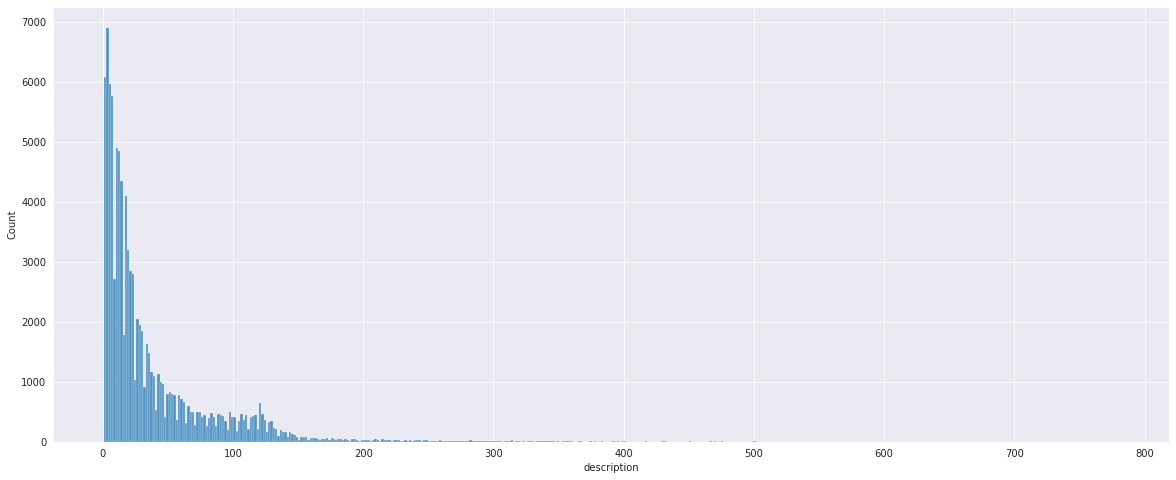

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,8))
sns.histplot(seqlen)

In [ ]:
sentences = list(cs987['text'])

In [ ]:
def calc_max_length(lines):
	return max([len(s.split()) for s in lines])
 
calc_max_length(sentences) # Can see max length is 459, but we don't need it to be that long. will stick with 150.

459

In [ ]:
vocab_size = 10000
max_length = 150
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = math.ceil(len(cs987) * 0.8)

In [ ]:
training_text = sentences[0:training_size]
testing_text = sentences[training_size:]

# Also apply this to the labels (did above, label encoded 'label' column)

training_labels = labels[0:training_size] 
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_text)

word_index = tokenizer.word_index

text_training_sequences = tokenizer.texts_to_sequences(training_text)
text_training_padded = pad_sequences(text_training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

text_testing_sequences = tokenizer.texts_to_sequences(testing_text)
text_testing_padded = pad_sequences(text_testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#### For Titles

In [ ]:
seqlen = cs987['title'].apply(lambda x: len(x.split()))

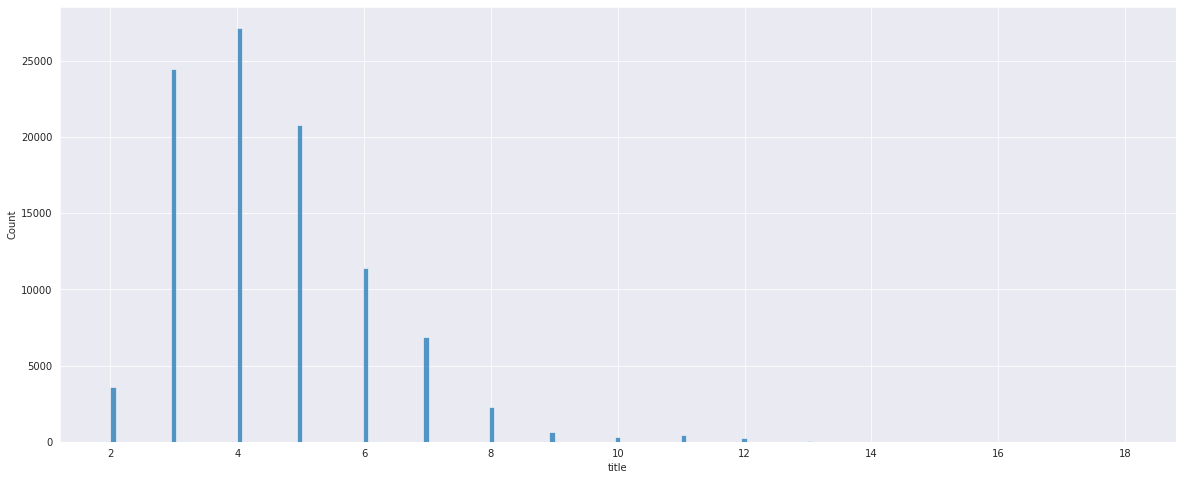

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,8))
sns.histplot(seqlen)

In [ ]:
titles = list(cs987['title'])

In [ ]:
def calc_max_length(lines):
	return max([len(s.split()) for s in lines])
 
calc_max_length(titles) # 18

18

In [ ]:
vocab_size_title = 5000
max_length_title = 18
training_title = titles[0:training_size]
testing_title = titles[training_size:]

In [ ]:
tokenizer_title = Tokenizer(num_words=vocab_size_title, oov_token=oov_tok)
tokenizer_title.fit_on_texts(training_title)

word_index_title = tokenizer_title.word_index

title_training_sequences = tokenizer_title.texts_to_sequences(training_title)
title_training_padded = pad_sequences(title_training_sequences, maxlen=max_length_title, padding=padding_type, truncating=trunc_type)

title_testing_sequences = tokenizer_title.texts_to_sequences(testing_title)
title_testing_padded = pad_sequences(title_testing_sequences, maxlen=max_length_title, padding=padding_type, truncating=trunc_type)

![Picture](https://drive.google.com/uc?export=view&id=15UPUrQk-cU6MnDAE2ITrsF8lGBb2Dn39)

## Code for Random Forest and basic NN

In [ ]:
contracts = pd.read_csv('german-contracts-train.csv', dtype=str)

In [ ]:
def textPreProcessing(df):
    dataToClean = df[['title','description']].copy()
    #Change data to lower case
    dataToClean['title'] = dataToClean['title'].str.lower()
    dataToClean['description'] = dataToClean['description'].str.lower()
    # Remove English stopwords
    english_stop = stopwords.words('english')
    dataToClean['title'] = dataToClean['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (english_stop)]))
    #german stop words
    german_stop = stopwords.words('german')
    dataToClean['description'] = dataToClean['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (german_stop)]))
    #Remove special german characters
    dataToClean['title'] = dataToClean.title.str.replace('ö', 'o')
    dataToClean['title'] = dataToClean.title.str.replace('ü', 'u')
    dataToClean['description'] = dataToClean.description.str.replace('ö', 'o')
    dataToClean['description'] = dataToClean.description.str.replace('ü', 'u')
    #Remove non-alphabetical values
    dataToClean['title'] = dataToClean.title.str.replace('[^a-zA-Z]', ' ')
    dataToClean['description'] = dataToClean.description.str.replace('[^a-zA-Z]', ' ')
    #First two words in title are germany followed by city, remove them 
    dataToClean['title'] = dataToClean['title'].str.split(n=1).str[1]
    #dataToClean['title'] = dataToClean['title'].str.split(n=1).str[1]

    return(dataToClean)

cleanTextInput = textPreProcessing(contracts)

In [ ]:
y = contracts['label']
Encoder = LabelEncoder()
y = Encoder.fit_transform(y)

In [ ]:
def testModels(dfCol):
    #Split training and test sets
    Train_X, Test_X, Train_Y, Test_Y = train_test_split(dfCol, y, test_size=0.2, random_state=42)
    #colVectorise is the new title_v
    global colVectorise
    colVectorise = TfidfVectorizer(max_features=10000)
    colVectorise.fit(dfCol)
    #Train sets
    Train_X_encoded = colVectorise.transform(Train_X)
    #Test sets
    Test_X_encoded = colVectorise.transform(Test_X)   

    global RFC
    RFC =RandomForestClassifier(n_estimators=300)
    RFC.fit(Train_X_encoded,Train_Y)
    predictions_RFC_Train = RFC.predict(Train_X_encoded)
    predictions_RFC = RFC.predict(Test_X_encoded)
    print("Random Forrest Train Accuracy Score -> ",accuracy_score(predictions_RFC_Train, Train_Y)*100)
    print("Random Forrest Test Accuracy Score -> ",accuracy_score(predictions_RFC, Test_Y)*100)

    global SVM
    SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    SVM.fit(Train_X_encoded,Train_Y)
    predictions_SVM_Train = SVM.predict(Train_X_encoded)
    predictions_SVM = SVM.predict(Test_X_encoded)
    print("SVM Train Accuracy Score -> ",accuracy_score(predictions_SVM_Train, Train_Y)*100)
    print("SVM Test Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
    
    global Naive
    Naive = naive_bayes.MultinomialNB()
    Naive.fit(Train_X_encoded,Train_Y)
    predictions_NB_Train = SVM.predict(Train_X_encoded)
    predictions_NB = Naive.predict(Test_X_encoded)
    print("Naive Bayes Train Accuracy Score -> ",accuracy_score(predictions_NB_Train, Train_Y)*100)
    print("Naive Bayes Test Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

    
# Enter column you want to use 
testModels(cleanTextInput['title'])

In [ ]:
vocab_size = 10000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

def tokeniseCol(df_col):
    global max_length, training_y, testing_y,text_training_padded, text_testing_padded, tokenizer
    sentences = list(df_col)
    max_length = max([len(s.split()) for s in sentences])
    length = len(df_col)
    training_size = math.ceil(length * 0.8)
    training_text = df_col[0:training_size]
    testing_text = df_col[training_size:]
    training_y = y[0:training_size] 
    testing_y = y[training_size:]
    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(df_col)
    word_index = tokenizer.word_index
    text_training_sequences = tokenizer.texts_to_sequences(training_text)
    text_training_padded = pad_sequences(text_training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    text_testing_sequences = tokenizer.texts_to_sequences(testing_text)
    text_testing_padded = pad_sequences(text_testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    
tokeniseCol(cleanTextInput['title'])

In [ ]:
def build_base_NN(n_hidden = 4, n_neurons=100, dense_activation = 'relu', learn=3e-3, dropout_rate=0.05,embedding_dim = 16):
    model = keras.models.Sequential()
    model.add(keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length))
    model.add(keras.layers.GlobalAveragePooling1D())
    for layer in range(n_hidden):
        model.add(keras.layers.Dropout(dropout_rate))
        model.add(keras.layers.Dense(n_neurons, dense_activation))
    model.add(keras.layers.Dense(len(contracts['label'].unique()), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
base_NN = build_base_NN()
early_stopping = EarlyStopping(patience = 5, restore_best_weights=True)
history = base_NN.fit(text_training_padded, training_y,validation_data=(text_testing_padded, testing_y), epochs=40, verbose=2,callbacks=[early_stopping])

In [ ]:
def getPredictions(model):
    contractsTest = pd.read_csv('german-contracts-test.csv')
    #Pre-Process data
    kaggleTest = textPreProcessing(contractsTest)
    #Encode kaggle data
    kaggleTest_title = colVectorise.transform(kaggleTest['title'])
    predictions = model.predict(kaggleTest_title)
    # Inverse transform
    kagglePredictions = Encoder.inverse_transform(predictions)
    #Save to DF
    kagglePredictionsDF = pd.DataFrame(kagglePredictions, columns = ['label'])
    #Join Docid
    predictionsDocid = pd.DataFrame(contractsTest['docid'])
    finalPredictions =  predictionsDocid.merge(kagglePredictionsDF, left_index=True, right_index=True)
    finalPredictions.to_csv("predictions_RF.csv", index=False) 

getPredictions(RFC)

In [ ]:
def getPredictions_NN(model):
    contractsTest = pd.read_csv('german-contracts-test.csv')
    #Pre-Process data
    kaggleTest = textPreProcessing(contractsTest)
    testing_sequences = tokenizer.texts_to_sequences(kaggleTest['title'])
    testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    testing_padded = np.array(testing_padded)
    predictions = model.predict_classes(testing_padded)
    #inverse transform
    kagglePredictions = Encoder.inverse_transform(predictions)
    #Save to DF
    kagglePredictionsDF = pd.DataFrame(kagglePredictions, columns = ['label'])
    predictionsDocid = pd.DataFrame(contractsTest['docid'])
    finalPredictions =  predictionsDocid.merge(kagglePredictionsDF, left_index=True, right_index=True)
    finalPredictions.to_csv("predictions_NN.csv", index=False)     
    


getPredictions_NN(base_NN)

## Transformers Code

In [ ]:
 # All From "Preprocessing "

training_text 
testing_text 

training_labels 
testing_labels 

In [ ]:
from simpletransformers.classification import ClassificationModel # needs simpletransformers installed

In [ ]:
# Create a ClassificationModel
model = ClassificationModel('bert', 'bert-base-german-dbmdz-uncased', num_labels=len(np.unique(labels))) # german-nlp-group/electra-base-german-uncased

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/442M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-german-dbmdz-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

Downloading:   0%|          | 0.00/247k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/487k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [ ]:
model.train_model([training_text,training_labels])

  0%|          | 0/88488 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/11061 [00:00<?, ?it/s]

(11061, 0.8482503245872879)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

  0%|          | 0/9832 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1229 [00:00<?, ?it/s]

In [ ]:
result

{'eval_loss': 0.5963744479996903, 'mcc': 0.7936844889372329}

 * NOTE: A similar process to read all final outputs to kaggle, This will be the only one explicitly shown to prevent the notebook from being too bloated'

In [ ]:
final_test_labels = cs987_test['description'].tolist()
final_predictions, final_raw_outputs = model.predict(final_test_labels)

  0%|          | 0/24581 [00:00<?, ?it/s]

  0%|          | 0/3073 [00:00<?, ?it/s]

In [ ]:
inverse_final_predictions = le.inverse_transform(final_predictions)
docid = cs987_test["docid"].to_list()
Kaggle = list(zip(docid,kaggle_predictions))
kaggle_comp_predictions = pd.DataFrame(Kaggle,columns = ['docid','label'])
kaggle_comp_predictions['label'] = kaggle_comp_predictions['label'].astype('str')
kaggle_comp_predictions['docid'] = kaggle_comp_predictions['docid'].astype('str')
kaggle_comp_predictions.to_excel('BERT_uncased_transformer_model.xlsx', header = True,index = False)

## CNN Code

### Models 

In [ ]:
# define the model
def single_feature_model(length, vocab_size):
	# channel 1
	inputs1 = Input(shape=(length,))
	embedding1 = Embedding(vocab_size + 1, 100)(inputs1)
	conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
	drop1 = Dropout(0.5)(conv1)
	pool1 = MaxPooling1D(pool_size=2)(drop1)
	flat1 = Flatten()(pool1)
	# channel 2
	inputs2 = Input(shape=(length,))
	embedding2 = Embedding(vocab_size + 1, 100)(inputs2)
	conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
	drop2 = Dropout(0.5)(conv2)
	pool2 = MaxPooling1D(pool_size=2)(drop2)
	flat2 = Flatten()(pool2)
	# channel 3
	inputs3 = Input(shape=(length,))
	embedding3 = Embedding(vocab_size + 1, 100)(inputs3)
	conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
	drop3 = Dropout(0.5)(conv3)
	pool3 = MaxPooling1D(pool_size=2)(drop3)
	flat3 = Flatten()(pool3)
	# merge
	merged = concatenate([flat1, flat2, flat3])
	# interpretation
	dense1 = Dense(50, activation='relu')(merged)
	outputs = Dense(176, activation='softmax')(dense1) # this was len(np.unique(labels)) - but 176 is just tidier. 
	model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
	return model

In [ ]:
# define the model
def mega_model(length,
               vocab_size, 
               length_text, 
               vocab_size_text,
               activation_function = 'relu'):
    # channel 1
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size + 1, 100)(inputs1)
    conv1 = Conv1D(filters=100, kernel_size=4, activation= activation_function)(embedding1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(pool1)
    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(vocab_size+ 1, 100)(inputs2)
    conv2 = Conv1D(filters=100, kernel_size=6, activation= activation_function)(embedding2)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(pool2)
    # channel 3
    inputs3 = Input(shape=(length,))
    embedding3 = Embedding(vocab_size+ 1, 100)(inputs3)
    conv3 = Conv1D(filters=32, kernel_size=8, activation= activation_function)(embedding3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(pool3)
  
    # merge
    merged = concatenate([flat1, flat2, flat3])
    

  # channel 1 _text
    inputs1_text = Input(shape=(length_text,))
    embedding1_text = Embedding(vocab_size_text+ 1, 100)(inputs1_text)
    conv1_text = Conv1D(filters=32, kernel_size=4, activation= activation_function)(embedding1_text)
    drop1_text = Dropout(0.5)(conv1_text)
    pool1_text = MaxPooling1D(pool_size=2)(drop1_text)
    flat1_text = Flatten()(pool1_text)
  
    # channel 2
    inputs2_text = Input(shape=(length_text,))
    embedding2_text = Embedding(vocab_size_text+ 1, 100)(inputs2_text)
    conv2_text = Conv1D(filters=32, kernel_size=6, activation= activation_function)(embedding2_text)
    drop2_text = Dropout(0.5)(conv2_text)
    pool2_text = MaxPooling1D(pool_size=2)(drop2_text)
    flat2_text = Flatten()(pool2_text)
  
    # channel 3
    inputs3_text = Input(shape=(length_text,))
    embedding3_text = Embedding(vocab_size+ 1, 100)(inputs3_text)
    conv3_text = Conv1D(filters=100, kernel_size=8, activation= activation_function)(embedding3_text)
    drop3_text = Dropout(0.5)(conv3_text)
    pool3_text = MaxPooling1D(pool_size=2)(drop3_text)
    flat3_text = Flatten()(pool3_text)
    # merge
    merged_text = concatenate([flat1_text, flat2_text, flat3_text])
    # merge two together
    merged_channels = concatenate([merged,merged_text])


    # interpretation
    dense1 = Dense(50, activation=activation_function)(merged_channels)
    outputs = Dense(176, activation='softmax')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3,inputs1_text, inputs2_text, inputs3_text], outputs=outputs)
    # compile
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize
    print(model.summary())
    plot_model(model, show_shapes=True, to_file='multichannel-multifeature1.png')
    return model

### Single Features Models

#### Text/descriptions

In [ ]:
# define model
model = single_feature_model(length = 150,vocab_size = 10000)

# compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# summarize
print(model.summary())

plot_model(model, show_shapes=True, to_file='multichannel.png')
# fit model
model.fit([text_training_padded,text_training_padded,text_training_padded], array(training_labels), epochs=10, batch_size=50)
# save the model
model.save('10_4_21_12_29.h5')

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 150, 100)     1000100     input_7[0][0]                    
____________________________________________________________________________________________

#### Titles

In [ ]:
# define model
title_model = single_feature_model(18,5000)

# compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# summarize
print(model.summary())
plot_model(model, show_shapes=True, to_file='multichannel.png')

# fit model
title_model.fit([title_training_padded,title_training_padded,title_training_padded], training_labels, epochs=10, batch_size=50)

# save the model
title_model.save('10_4_21_12_44.h5')

In [ ]:
title_model.evaluate([title_testing_padded,title_testing_padded,title_testing_padded],testing_labels) # Forgot to include within fit, so evaluation done afterwards

615/615 [==============================] - 2s 3ms/step - loss: 0.3825 - accuracy: 0.9208


[0.3824816942214966, 0.9208197593688965]

### Multi Features model

In [ ]:
multi_model = mega_model(length = max_length, vocab_size=vocab_size, length_text=max_length_title, vocab_size_text=vocab_size_title)

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_67 (InputLayer)           [(None, 150)]        0                                            
__________________________________________________________________________________________________
input_68 (InputLayer)           [(None, 150)]        0                                            
__________________________________________________________________________________________________
input_69 (InputLayer)           [(None, 150)]        0                                            
__________________________________________________________________________________________________
input_70 (InputLayer)           [(None, 18)]         0                                            
___________________________________________________________________________________________

In [ ]:
multi_model.fit([text_training_padded,text_training_padded,text_training_padded,title_training_padded,title_training_padded,title_training_padded],
                training_labels, 
                validation_data = ([text_testing_padded,text_testing_padded,text_testing_padded,title_testing_padded,title_testing_padded,title_testing_padded],testing_labels),
                epochs=10, batch_size=50) # up this to 50
# save the model
multi_model.save('multi_model_10_4_21_15_37.h5')

Epoch 1/10
1574/1574 [==============================] - 62s 38ms/step - loss: 1.0865 - accuracy: 0.7846 - val_loss: 0.4949 - val_accuracy: 0.9140
Epoch 2/10
1574/1574 [==============================] - 59s 38ms/step - loss: 0.3645 - accuracy: 0.9197 - val_loss: 0.3990 - val_accuracy: 0.9215
Epoch 3/10
1574/1574 [==============================] - 59s 38ms/step - loss: 0.2366 - accuracy: 0.9400 - val_loss: 0.3711 - val_accuracy: 0.9236
Epoch 4/10
1574/1574 [==============================] - 59s 38ms/step - loss: 0.1633 - accuracy: 0.9575 - val_loss: 0.3709 - val_accuracy: 0.9288
Epoch 5/10
1574/1574 [==============================] - 59s 38ms/step - loss: 0.1280 - accuracy: 0.9654 - val_loss: 0.3984 - val_accuracy: 0.9284
Epoch 6/10
1574/1574 [==============================] - 59s 38ms/step - loss: 0.0944 - accuracy: 0.9742 - val_loss: 0.4221 - val_accuracy: 0.9322
Epoch 7/10
1574/1574 [==============================] - 59s 37ms/step - loss: 0.0821 - accuracy: 0.9770 - val_loss: 0.4322 -

##  BERT Tokenizer CNN Code

### Prep Descriptions

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment') 
# Changed this from bert-base-cased, as bert-base is in english. We want german. nlptown/bert-base-multilingual-uncased-sentiment
# dbmdz/bert-base-german-uncased

In [ ]:
SEQ_len = 150 

In [ ]:
Xids = np.zeros((len(cs987),SEQ_len))
for i, sequence in enumerate(cs987['text']):
  tokens = tokenizer.encode_plus(sequence, max_length = SEQ_len, truncation=True, padding = "max_length",
                               add_special_tokens = False,return_token_type_ids = False, 
                               return_attention_mask = False, return_tensors = 'np')
  Xids[i, :] = tokens['input_ids']

In [ ]:
vocab_size = len(tokenizer.vocab)
vocab_size

105879

In [ ]:
training_size = math.ceil(len(cs987) * 0.8)
bert_train_text= Xids[0:training_size]
bert_test_text = Xids[training_size:]

### Prep titles

In [ ]:
SEQ_len_text = 15

In [ ]:
Xids_text = np.zeros((len(cs987),SEQ_len_text))
for i, sequence in enumerate(cs987['text']):
  tokens_text = tokenizer_text.encode_plus(sequence, max_length = SEQ_len_text, truncation=True, padding = "max_length",
                               add_special_tokens = False,return_token_type_ids = False, 
                               return_attention_mask = False, return_tensors = 'np')
  Xids_text[i, :] = tokens_text['input_ids']

In [ ]:
bert_train_title = Xids_text[0:training_size]
bert_test_title = Xids_text[training_size:]

training_labels = labels[0:training_size] 
testing_labels = labels[training_size:]

### Model

In [ ]:
# Just as a reminder.
SEQ_len = 150
SEQ_len_text = 15
vocab_size # 10,589

In [ ]:
multi_model = mega_model(length = SEQ_len, vocab_size=vocab_size, length_text=SEQ_len_text, vocab_size_text=vocab_size)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 15)]         0                                            
______________________________________________________________________________________________

In [ ]:
multi_model.fit([bert_train_text,bert_train_text,bert_train_text,bert_train_title,bert_train_title,bert_train_title],
                training_labels, 
                validation_data = ([bert_test_text,bert_test_text,bert_test_text,bert_test_title,bert_test_title,bert_test_title],testing_labels),
                epochs=10, batch_size=50) # up this to 50
# save the model
multi_model.save('MEGA_model_with_BERT.h5')

Epoch 1/10
1574/1574 [==============================] - 616s 390ms/step - loss: 1.3420 - accuracy: 0.6971 - val_loss: 0.7469 - val_accuracy: 0.8312
Epoch 2/10
1574/1574 [==============================] - 617s 392ms/step - loss: 0.5052 - accuracy: 0.8745 - val_loss: 0.6252 - val_accuracy: 0.8571
Epoch 3/10
1574/1574 [==============================] - 615s 390ms/step - loss: 0.2945 - accuracy: 0.9206 - val_loss: 0.6298 - val_accuracy: 0.8657
Epoch 4/10
1574/1574 [==============================] - 617s 392ms/step - loss: 0.1903 - accuracy: 0.9464 - val_loss: 0.6623 - val_accuracy: 0.8700
Epoch 5/10
1574/1574 [==============================] - 620s 394ms/step - loss: 0.1409 - accuracy: 0.9606 - val_loss: 0.7587 - val_accuracy: 0.8731
Epoch 6/10
1574/1574 [==============================] - 621s 394ms/step - loss: 0.1124 - accuracy: 0.9691 - val_loss: 0.8114 - val_accuracy: 0.8692
Epoch 7/10
1574/1574 [==============================] - 618s 393ms/step - loss: 0.0960 - accuracy: 0.9730 - val_